In [ ]:
# Upload your kaggle.json file 
from google.colab import files
files.upload() 


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankitsharmajhansal","key":"f6041080458a4e0d9733878072c92354"}'}

In [ ]:

import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
# Download using correct dataset ID
!kaggle datasets download -d niharika41298/yoga-poses-dataset

# Unzip it into a working folder
!unzip -q yoga-poses-dataset.zip -d /content/yoga_data


Dataset URL: https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset
License(s): ODbL-1.0
 88% 254M/288M [00:00<00:00, 747MB/s] 
100% 288M/288M [00:00<00:00, 798MB/s]


In [ ]:
data_path = '/content/yoga_data/DATASET'    


In [5]:
!ls /content/yoga_data


DATASET


Classes found: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Loaded 1080 images from /content/yoga_data/DATASET/TRAIN
Classes found: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Loaded 470 images from /content/yoga_data/DATASET/TEST


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 110, 110, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,317 (9.36 MB)

 Trainable params: 2,453,317 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.2380 - loss: 1.6524 - val_accuracy: 0.4872 - val_loss: 1.3991
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4352 - loss: 1.4131 - val_accuracy: 0.6426 - val_loss: 1.0106
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5609 - loss: 1.1713 - val_accuracy: 0.7085 - val_loss: 0.7885
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6445 - loss: 0.9475 - val_accuracy: 0.7617 - val_loss: 0.6896
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6950 - loss: 0.8002 - val_accuracy: 0.7872 - val_loss: 0.5742
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7819 - loss: 0.5852 - val_accuracy: 0.8255 - val_loss: 0.5119
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8508 - loss: 0.4480 - val_accuracy: 0.8362 - val_loss: 0.4867
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8875 - loss: 0.3287 - val_accuracy: 0.8617 -

Model saved successfully.


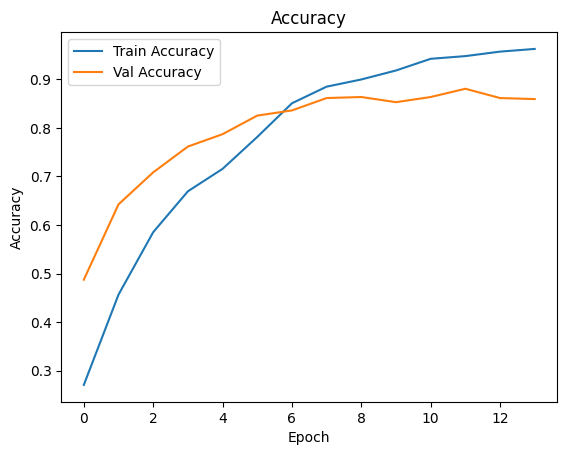

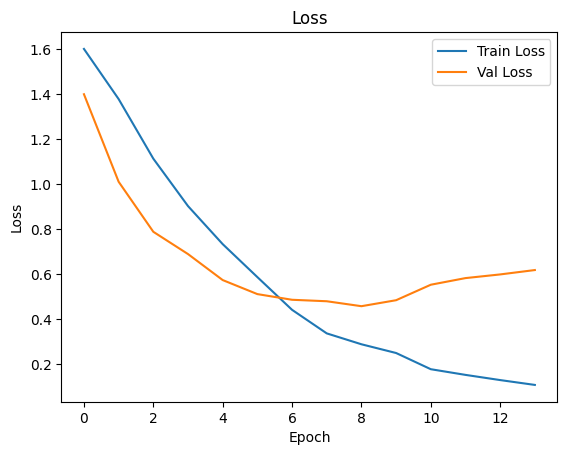

In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Paths to train/test folders
train_path = '/content/yoga_data/DATASET/TRAIN'
test_path = '/content/yoga_data/DATASET/TEST'

# Image size
IMG_SIZE = (112, 112)

# Load images and labels from a folder
def load_images(data_dir, img_size=IMG_SIZE):
    X = []
    y = []
    classes = sorted(os.listdir(data_dir))
    label_map = {cls: idx for idx, cls in enumerate(classes)}
    print("Classes found:", classes)

    for cls in classes:
        class_folder = os.path.join(data_dir, cls)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_folder, filename)
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        X.append(img)
                        y.append(label_map[cls])

    X = np.array(X)
    y = np.array(y)
    print(f"Loaded {len(X)} images from {data_dir}")
    return X, y, label_map

# Load datasets
X_train, y_train, label_map = load_images(train_path)
X_test, y_test, _ = load_images(test_path)

# Shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
num_classes = len(label_map)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)
# Save the trained model to Google Drive (or local path)
model.save('/content/drive/My Drive/yoga_asana_cnn_model.h5')
print("Model saved successfully.")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
import tensorflow as tf
import os
import cv2
import numpy as np

# Define label_map exactly as per your classes (modify as needed)
label_map = {
    'downdog': 0,
    'goddess': 1,
    'plank': 2,
    'tree': 3,
    'warrior2': 4
}

# Create inverse label map
inv_label_map = {v: k for k, v in label_map.items()}

# Image size (must match training)
IMG_SIZE = (112, 112)

# Prediction function
def predict_image(image_path, model, inv_label_map, img_size=IMG_SIZE):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Shape: (1, height, width, 3)

    prediction = model.predict(img)
    predicted_class_idx = np.argmax(prediction, axis=1)[0]
    predicted_class_name = inv_label_map.get(predicted_class_idx, "Unknown")

    print(f"Predicted class for {os.path.basename(image_path)}: {predicted_class_name}")
    return predicted_class_name

# Load your trained model
from tensorflow.keras.models import load_model
model_path = "/content/drive/My Drive/yoga_asana_cnn_model.h5"
model = load_model(model_path)

# Example test image
test_image_path = "/content/yoga_data/DATASET/TEST/goddess/00000009.jpg"  # Change accordingly



# Run prediction
predict_image(test_image_path, model, inv_label_map)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Predicted class for 00000009.jpg: goddess


'goddess'

In [8]:
model.save('yoga_pose_model.keras')




In [10]:
from google.colab import files
files.download('yoga_pose_model.keras')     # Or use .keras if you saved with that


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>